# 2-5-5. 시각화

In [1]:
# healthcare-dataset-2.csv 불러오기.

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.read_csv('healthcare-dataset-2.csv')
df.shape

(4194, 12)

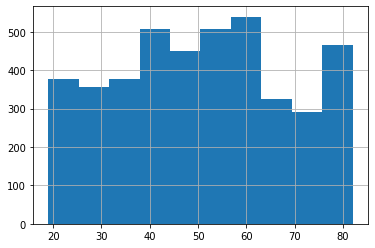

In [2]:
# 나이(age) 히스토그램 그리기.

import matplotlib.pyplot as plt   # matplotlib 라이브러리 호출.
%matplotlib inline                
df['age'].hist()

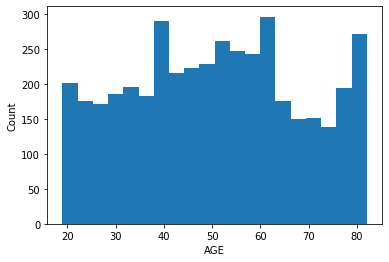

In [6]:
# 나이(age) 히스토그램의 x축, y축 이름 넣기.

x = df["age"]
plt.hist(x, density=False, bins=20)  # density=False 자료의 개수를 디스플레이함.
plt.ylabel('Count')
plt.xlabel('AGE');                   # 세미콜론(;)을 빼고도 실행해 볼 것.

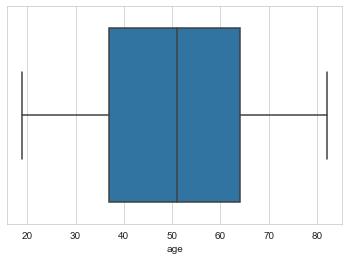

In [7]:
# 나이(age)의 상자그림(boxplot) 그리기.

import seaborn as sns
sns.set_style('whitegrid')
axes = sns.boxplot(x ='age', data = df) 

In [8]:
# 나이(age) 요약 통계.
df['age'].describe()

count    4194.000000
mean       50.662852
std        17.532031
min        19.000000
25%        37.000000
50%        51.000000
75%        64.000000
max        82.000000
Name: age, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9b01601490>,
      dtype=object)

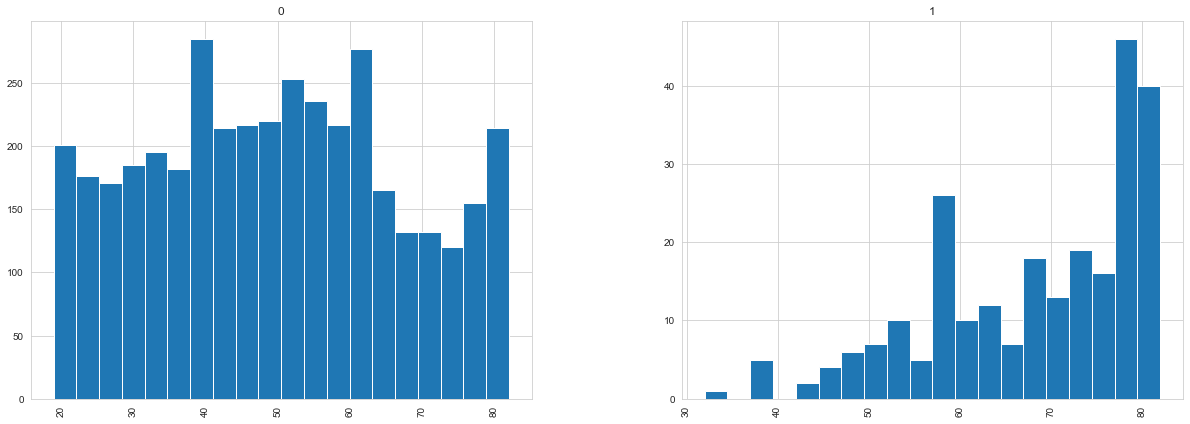

In [9]:
# 나이(age)를 타겟변수(stroke) 값 별로 구분하여 히스토그램 그리기.
# 두 그림의 y축의 스케일이 다름에 유의.
df.hist(by="stroke", column="age", bins=20, figsize=(20,7))

Text(0, 0.5, 'Count')

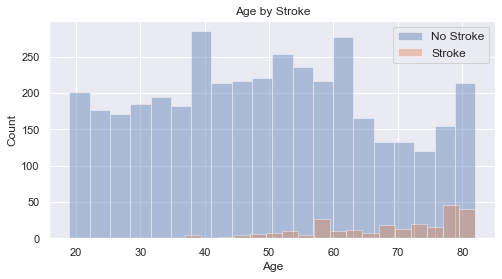

In [10]:
# 나이(age)를 타겟변수(stroke) 값 별로 구분하되 하나의 화면에 히스토그램 모아 그리기.
# 두 그림의 y축의 스케일이 같아져서 비교에 유리.

import seaborn as sns
sns.set(rc={'figure.figsize':(8, 4)}) # 그림 크기 조정.

df_graph = df[df['stroke']==0]
sns.distplot(df_graph['age'], bins=20, kde=False, label='No Stroke')

df_graph = df[df['stroke']==1]
sns.distplot(df_graph['age'], bins=20, kde=False, label='Stroke')

plt.legend(prop={'size':12})
plt.title('Age by Stroke')
plt.xlabel('Age')
plt.ylabel('Count');

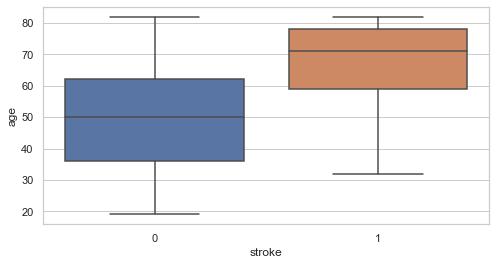

In [11]:
# 나이(age)의 상자그림을 타겟변수 값 별로 그리기.

import seaborn as sns
sns.set_style('whitegrid')
sns.boxplot(x = 'stroke', y = 'age', data = df) 

In [33]:
# 나이(age)의 타겟변수별 그룹 평균 구하기. 

group = df['age'].groupby(df['stroke'])
group.mean()

stroke
0    49.564479
1    68.214575
Name: age, dtype: float64

In [34]:
# 나이(age)의 타겟변수별 groupby + describe() 
group.describe()

,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
0,3947.0,49.564479,17.257041,19.0,36.0,50.0,62.0,82.0
1,247.0,68.214575,11.550108,32.0,59.0,71.0,78.0,82.0


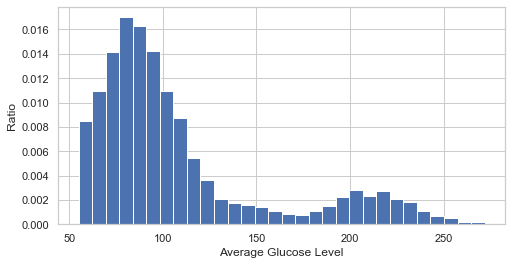

In [13]:
# 혈당량(avg_glucose_level) 히스토그램 구하기.

x = df["avg_glucose_level"]
plt.hist(x, density=True, bins=30)  # density=True 자료의 비율을 디스플레이함.
plt.ylabel('Ratio')
plt.xlabel('Average Glucose Level');

Text(0, 0.5, 'Count')

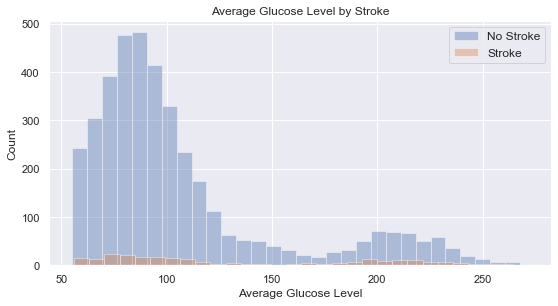

In [11]:
# 혈당량(avg_glucose_level)을 타겟변수 그룹별로 하나의 화면에 그래프로 그리기. 

import seaborn as sns
sns.set(rc={'figure.figsize':(9, 4.5)}) # 그림 크기 조정.

df_graph = df[df['stroke']==0]
sns.distplot(df_graph['avg_glucose_level'], bins=30, kde=False, label='No Stroke')

df_graph = df[df['stroke']==1]
sns.distplot(df_graph['avg_glucose_level'], bins=30, kde=False, label='Stroke')

plt.legend(prop={'size':12})
plt.title('Average Glucose Level by Stroke')
plt.xlabel('Average Glucose Level')
plt.ylabel('Count');

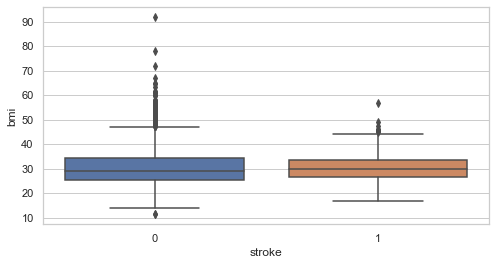

In [14]:
# 체질량 지수(bmi)를 타겟변수 그룹별로 상자그림 구하기.

sns.boxplot(x = 'stroke', y = 'bmi', data = df) 

In [28]:
# 체질량 지수(bmi)를 타겟변수 그룹별로 평균값 구하기.

group = df['bmi'].groupby(df['stroke'])
group.mean()

stroke
0    30.495271
1    30.469231
Name: bmi, dtype: float64

In [32]:
group.describe()

,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
0,3806.0,30.495271,7.267935,11.3,25.5,29.20,34.2,92.0
1,208.0,30.469231,6.344652,16.9,26.4,29.65,33.7,56.6


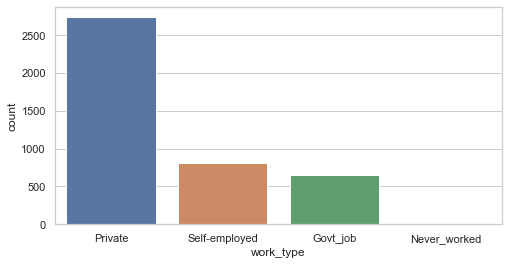

In [16]:
# 근무 형태(work_type) 카운트플롯 구하기.

x = df['work_type']
sns.countplot(x)

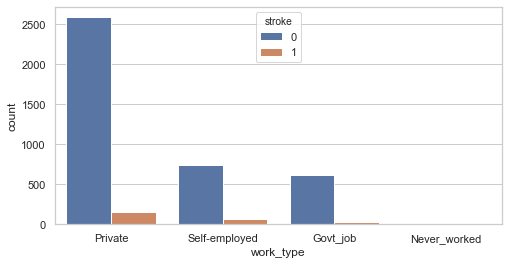

In [17]:
# 근무 형태(work_type)를 타겟변수 그룹별로 카운트플롯 구하기.
sns.countplot(x='work_type', hue='stroke', data=df)

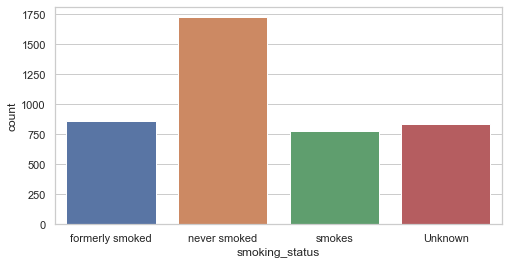

In [18]:
# 흡연 습관(smoking_status) 카운트플롯 구하기.
x = df['smoking_status']
sns.countplot(x)

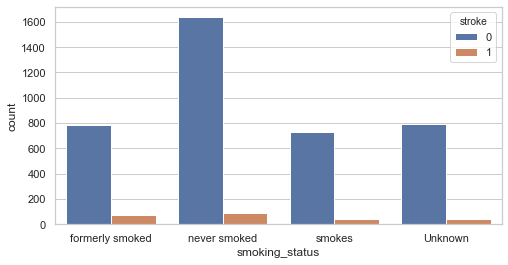

In [19]:
# 흡연 습관(smoking_status)를 타겟변수 그룹별로 카운트플롯 구하기.
sns.countplot(x='smoking_status', hue='stroke', data=df)

# 2-5-6. t 검정

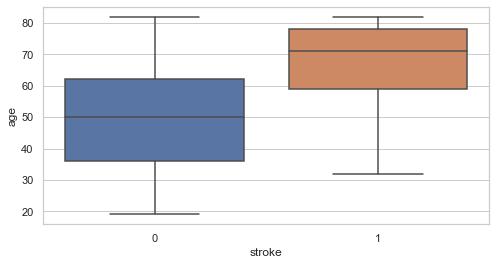

In [22]:
# 나이(age)의 상자그림을 타겟변수 값 별로 그리기.

import seaborn as sns
sns.set_style('whitegrid')
sns.boxplot(x = 'stroke', y = 'age', data = df) 

In [19]:
# 나이(age) 평균이 타겟변수 그룹별로 차이가 나는지 t 검정 실시.

from scipy import stats

data_1 = df[df['stroke'] == 1]['age']
data_0 = df[df['stroke'] == 0]['age']

stats.ttest_ind(data_1, data_0)   # 결과는 pvalue < 0.05 

Ttest_indResult(statistic=16.750725182022645, pvalue=5.1785610911612636e-61)

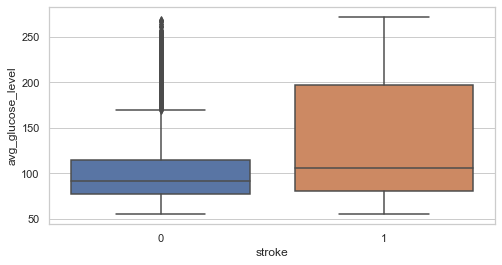

In [25]:
# 체질량 지수(bmi)를 타겟변수 그룹별로 상자그림 구하기.

sns.boxplot(x = 'stroke', y = 'avg_glucose_level', data = df) 

In [20]:
# 혈당량(avg_glucose_level) 평균이 타겟변수 그룹별로 차이가 나는지 t 검정 실시.

from scipy import stats

data_1 = df[df['stroke'] == 1]['avg_glucose_level']
data_0 = df[df['stroke'] == 0]['avg_glucose_level']

stats.ttest_ind(data_1, data_0)   # 결과는 pvalue < 0.05 

Ttest_indResult(statistic=8.32364517231606, pvalue=1.141432661658526e-16)

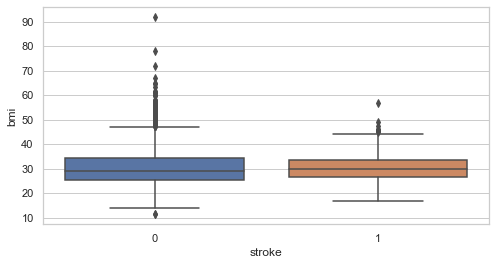

In [23]:
# 체질량 지수(bmi)를 타겟변수 그룹별로 상자그림 구하기.

sns.boxplot(x = 'stroke', y = 'bmi', data = df) 

In [24]:
# 체질량 지수(bmi) 평균이 타겟변수 그룹별로 차이가 나는지 t 검정 실시.

from scipy import stats

data_1 = df[df['stroke'] == 1]['bmi']
data_0 = df[df['stroke'] == 0]['bmi']

stats.ttest_ind(data_1, data_0)   # 결과는 pvalue 계산 불능. 

Ttest_indResult(statistic=nan, pvalue=nan)